In [6]:
import os
dir_ = 'data' 
Classes = os.listdir(dir_)
Classes

['Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine']

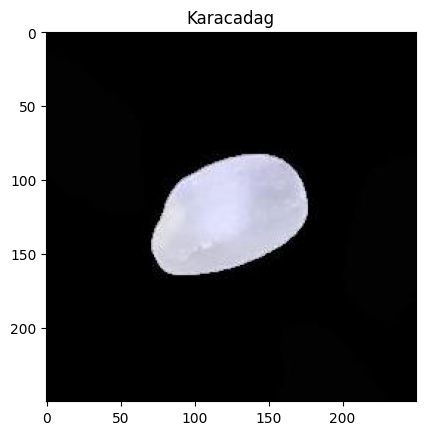

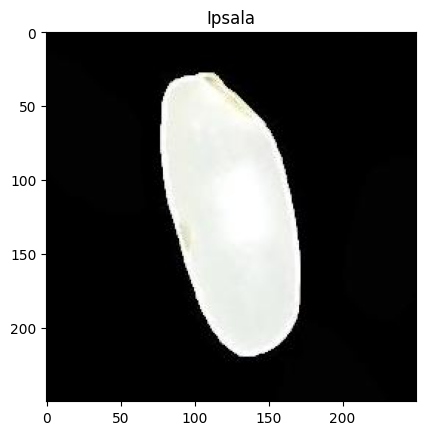

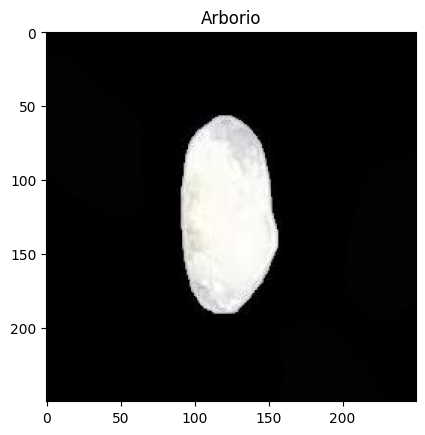

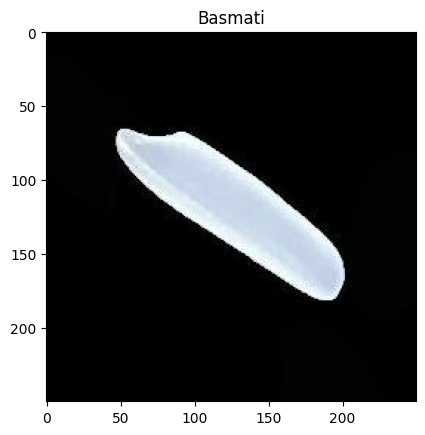

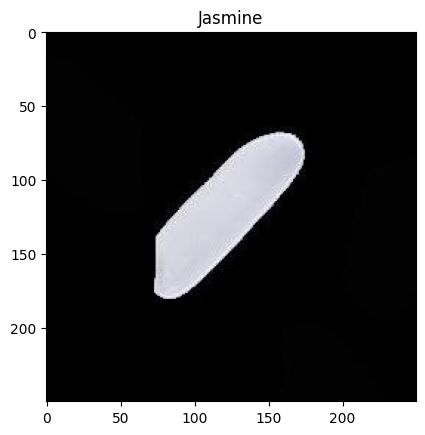

In [7]:
# plot for each class 5 images with the class name.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np

for Class in Classes:
    images = os.listdir(dir_ + '/' + Class)
    rand_images = random.sample(images, 1)
    for image in rand_images:
        img = mpimg.imread(dir_ + '/' + Class + '/' + image)
        plt.imshow(img)
        plt.title(Class)
        plt.show()


In [8]:
# plot the number of pictures in each class
num_images = []
for Class in Classes:
    images = os.listdir(dir_ + '/' + Class)
    num_images.append(len(images))
num_images


[15000, 15000, 15000, 15000, 15000]

In [9]:
from PIL import Image

all_sizes = {}

for Class in Classes:
    class_path = os.path.join(dir_, Class)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    
    sizes = set()
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        with Image.open(image_path) as img:
            sizes.add(img.size)
    
    all_sizes[Class] = sizes  # Store unique sizes found in each class

all_sizes

{'Karacadag': {(250, 250)},
 'Ipsala': {(250, 250)},
 'Arborio': {(250, 250)},
 'Basmati': {(250, 250)},
 'Jasmine': {(250, 250)}}

In [10]:
output_dir = 'resized_data'
os.makedirs(output_dir, exist_ok=True)

new_size = (128, 128)

for Class in Classes:
    class_path = os.path.join(dir_, Class)
    output_class_path = os.path.join(output_dir, Class)
    os.makedirs(output_class_path, exist_ok=True)
    
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        output_image_path = os.path.join(output_class_path, image_file)
        
        with Image.open(image_path) as img:
            img.thumbnail(new_size)  # Keep aspect ratio
            img.save(output_image_path)  # Save to new folder

In [11]:
Classes_resized = os.listdir(output_dir)
Classes_resized

['Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine']

In [12]:
all_sizes = {}

for Class in Classes_resized:
    class_path = os.path.join(output_dir, Class)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    
    sizes = set()
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        with Image.open(image_path) as img:
            sizes.add(img.size)
    
    all_sizes[Class] = sizes  # Store unique sizes found in each class

all_sizes

{'Karacadag': {(128, 128)},
 'Ipsala': {(128, 128)},
 'Arborio': {(128, 128)},
 'Basmati': {(128, 128)},
 'Jasmine': {(128, 128)}}

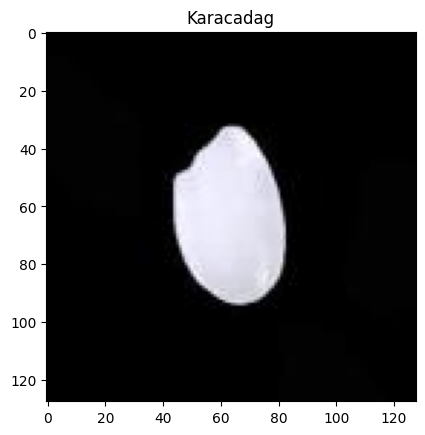

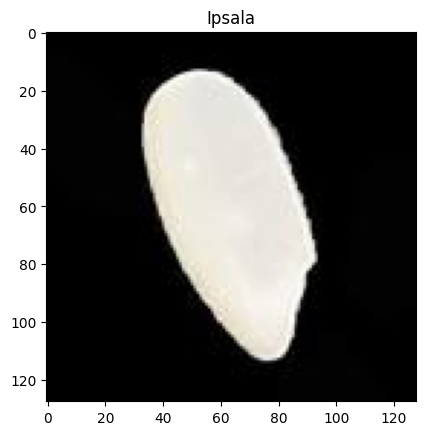

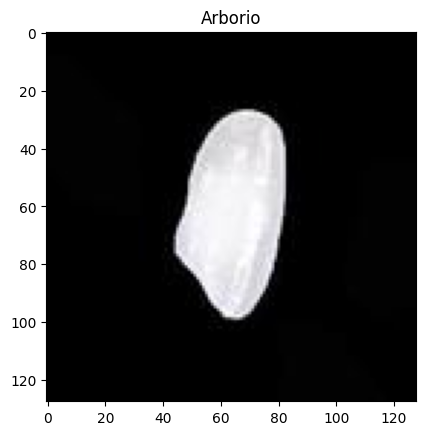

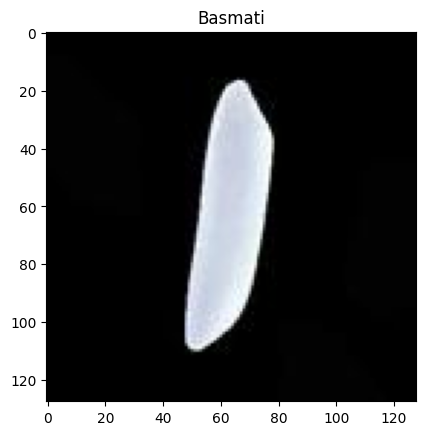

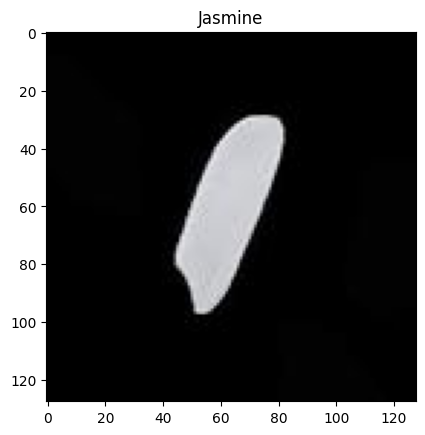

In [14]:
Classes = os.listdir('resized_data')

for Class in Classes:
    images = os.listdir(dir_ + '/' + Class)
    rand_images = random.sample(images, 1)
    for image in rand_images:
        img = mpimg.imread('resized_data' + '/' + Class + '/' + image)
        plt.imshow(img)
        plt.title(Class)
        plt.show()

---